# Analisa
- Stat Reviewnya,
    - stat recom ✅
    - pembandingan yg rekom dan tidak di setiap series ✅
- Kata yang sering muncul

In [34]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
files = ['Nisekoi', 'Nisekoi_', 'Nisekoi_monogatari', 'Nisekoi_OVA', 'Nisekoi__OVA']
data  = {}
for i in files:
    file_path = f'./nisekoi/{i}.csv'
    
    if not os.path.exists(file_path):
        print(f"Error: File {file_path} not found")
        data[i] = None
        continue
    
    if os.stat(file_path).st_size == 0:
        print("Error: JSON file is empty.")
        data[i] = None
    else:
        try:
            with open(file_path, "r") as f:
                data[i] = pd.read_csv(f)
        except pd.errors.EmptyDataError:
            data[i] = None

In [23]:
df = pd.DataFrame()

for i in data.keys():
    data[i]['Series'] = i
    df = pd.concat([df, data[i]])

In [50]:
# plt.rcParams.update({'font.size': 12, 'font.family': 'times new roman'})
# sns.histplot(df['tags'], color='darkgreen')
# plt.xlabel('Label', fontsize=12, fontfamily='times new roman')
# plt.ylabel('Count', fontsize=12, fontfamily='times new roman')
# plt.title('Distribution of Tags ALL', fontsize=12, fontfamily='times new roman')

# plt.show()

# for i in data.keys():
#     display_name = i.replace('_', ':', 1)
        
#     plt.rcParams.update({'font.size': 12, 'font.family': 'times new roman'})
#     sns.histplot(df[df['Series'] == i]['tags'], color='darkgreen')
#     plt.xlabel('Label', fontsize=12, fontfamily='times new roman')
#     plt.ylabel('Count', fontsize=12, fontfamily='times new roman')
#     plt.title(f'Distribution of Tags for {display_name} Series', fontsize=12, fontfamily='times new roman')

#     plt.show()

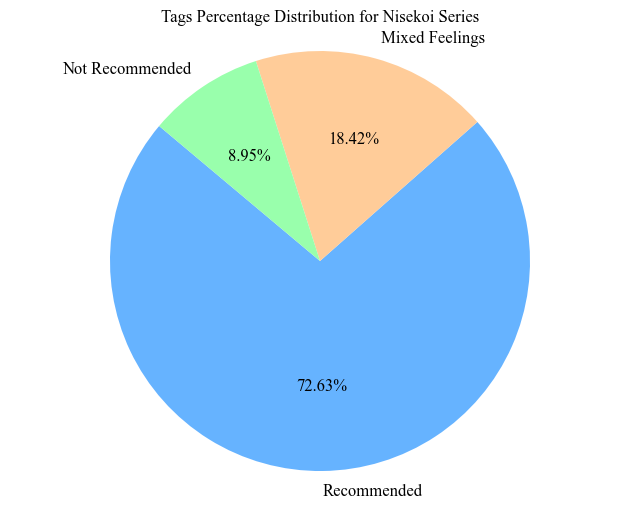

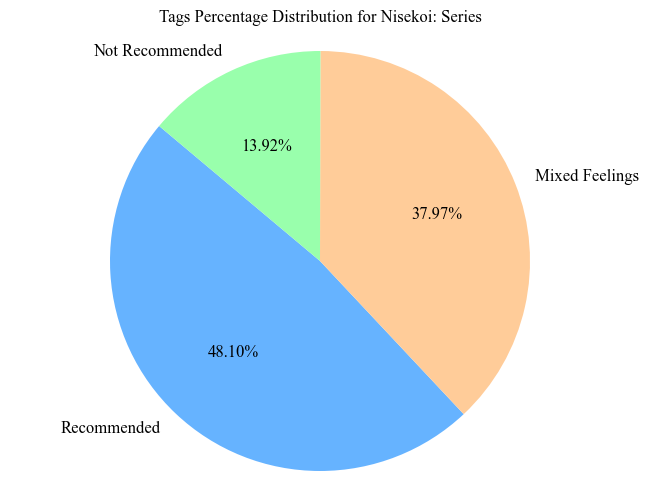

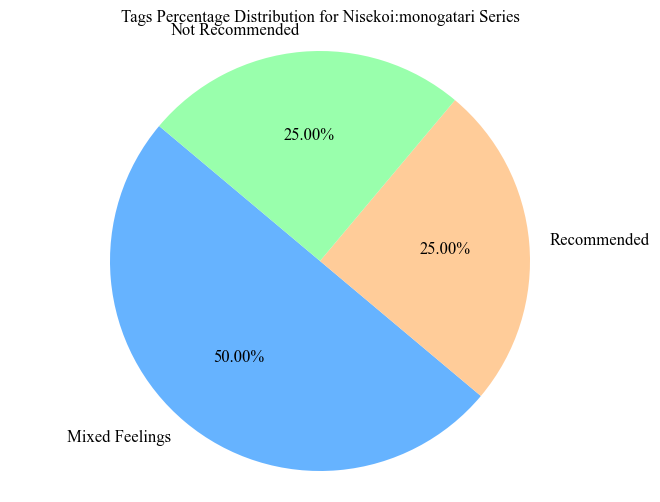

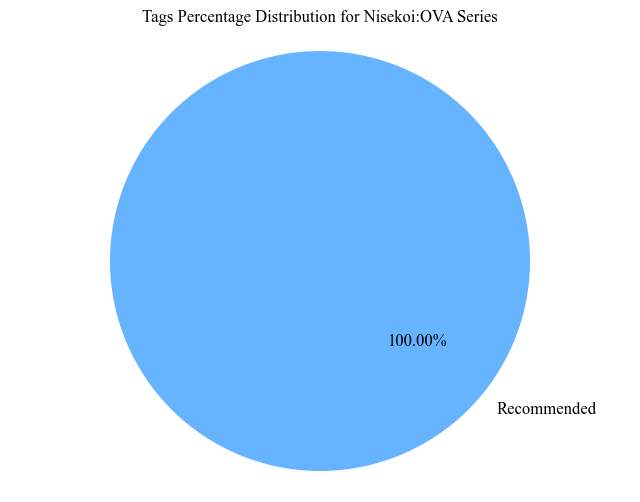

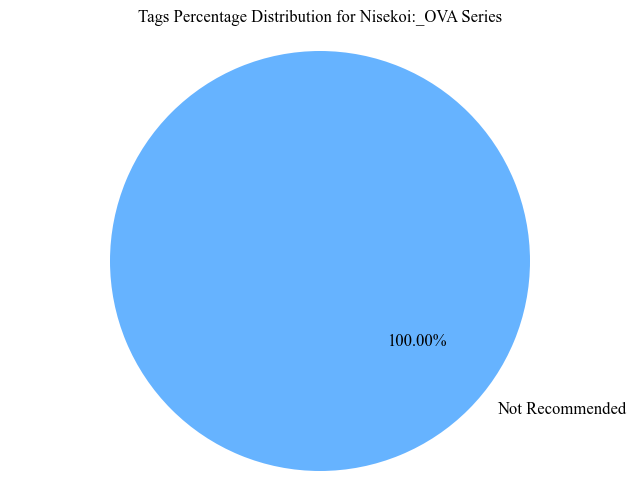

In [49]:
for i in data.keys():
    display_name = i.replace('_', ':', 1)
    
    label_counts = df[df['Series'] == i]['tags'].value_counts()
    total_data = label_counts.sum()
    label_percentages = round((label_counts / total_data) * 100, 2)

    plt.figure(figsize=(8, 6))
    plt.pie(
        label_percentages, 
        labels=label_percentages.index, 
        autopct='%1.2f%%', 
        startangle=140, 
        colors=['#66b3ff','#ffcc99','#99ffac','#f38379'],
        textprops={
            'fontsize': 12,
            'fontfamily': 'times new roman'
        }
        )
    plt.title(f'Tags Percentage Distribution for {display_name} Series', fontsize=12)
    plt.axis('equal')
    plt.show()